# UEF spectra handling 

<div class="alert alert-block alert-success">

<li>Soft for conjugated scanning-table and mobile spectrometer control was written by Kudarenko
<li>Transfer optical system (made by Kudarenko) from MSU to UEF, CVD processes, spectra collection were done by Malykhin
<li>Final engineering of the optical system at the UEF - Itkonen
<li>ML, Supervisor, inspirer - Ismagilov

</div>

## Part 4. Try to make nice images for article

<div class="alert alert-block alert-info">
<b> Strategy:</b>
<li> Scan "datasets" folder.
<li> Manualy plot different distributions (temperatures $T_{e}$ for electrons; $T_{rot}$ and $T_{vib}$ for $C_{2}$)

</div>

In [1]:
# Author: Rinat R. Ismagilov <ismagil@polly.phys.msu.ru>
#
# License: GNU General Public License v3.0

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 
%matplotlib inline

pd.options.display.max_rows = 10
# pd.options.display.float_format = '{:.1f}'.format


In [2]:
# nice practice
%reload_ext version_information
# pip install version_information

%version_information numpy, pandas, matplotlib, sklearn, version_information

Software versions
Python 3.5.6 64bit [MSC v.1900 64 bit (AMD64)]
IPython 5.1.0
OS Windows 10 10.0.18362 SP0
numpy 1.15.2
pandas 0.23.4
matplotlib 1.5.3
sklearn The 'sklearn' distribution was not found and is required by the application
version_information 1.0.3
Thu Aug 29 14:52:01 2019 RTZ 2 (ceia)

## Scan for *.pkl

In [3]:
import glob
pkl_namelist = glob.glob("datasets/*.pkl")
datasets = pd.Series(pkl_namelist)
pd.options.display.max_colwidth = 1000
datasets
# dflist = load_dflist_txt(txt_namelist)
# print(len(dflist))

0                datasets\xy_badPixels___MPMA_201905161.pkl
1    datasets\xy_NoDuble_wl_HaHb_Te_Tg___MPMA_201905161.pkl
2       datasets\xy_NoDuble_wl_HaHb_Te___MPMA_201905161.pkl
3                 datasets\xy_wl_Tg_raw__MPMA_201905161.pkl
4                        datasets\xy_wl__MPMA_201905161.pkl
dtype: object

In [4]:
df1 = pd.read_pickle(datasets[1])
df1.head()

,x,y,1922.31,1929.96,1937.62,1945.27,1952.92,1960.58,1968.23,1975.8799999999999,...,9538.85,9546.09,9553.33,9560.57,x_y,H_a,H_b,Te,Trot,Tvib
0,0.0,0.0,-4.547,-145.501,-204.610,-56.836,-6.820,-70.477,79.571,-6.820,...,478.516,691.772,404.719,504.410,0.0_0.0,410.482,60.123,0.578668,3030.00,2240.0
6827,0.0,1.0,15.914,-122.766,-236.438,-86.391,52.289,-54.563,31.828,-29.555,...,599.263,608.584,472.172,516.516,0.0_1.0,407.727,52.433,0.519410,1088.64,2370.0
6829,0.0,2.0,18.188,-150.047,-197.790,-84.118,61.383,-75.024,88.664,-15.914,...,661.872,678.637,535.410,488.269,0.0_2.0,411.170,51.035,0.505319,1847.42,2107.0
6831,0.0,3.0,-31.828,-134.133,-197.790,-52.289,25.008,-86.391,61.383,-2.273,...,599.263,656.745,434.230,484.233,0.0_3.0,404.283,51.734,0.517400,1050.48,2445.0
6833,0.0,4.0,15.914,-136.407,-220.524,-59.110,61.383,-40.922,45.469,-20.461,...,612.679,687.393,455.309,532.657,0.0_4.0,409.104,43.345,0.450700,1736.68,2166.0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 21148
Columns: 1032 entries, x to Tvib
dtypes: float64(1031), object(1)
memory usage: 53.8+ MB


In [6]:
coord = np.array(df1.iloc[:,:2].values,dtype='float64')
z_rot = df1["Trot"].values
# coord[:,0].max(), coord[:,1].max()
z_e = df1["Te"].values
z_c2 = df1["5161.54"].values # should be compared with neighbour
z_vib = df1["Tvib"].values

## Plot $T_{rot}$ and $T_{vib}$

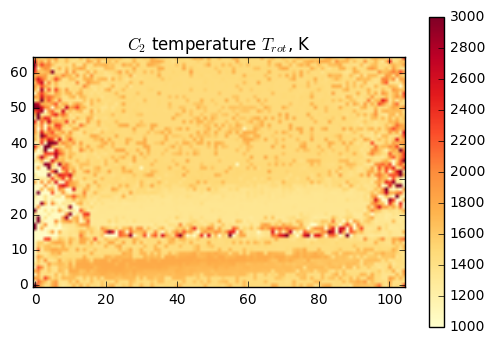

In [7]:
Z_rot = z_rot.reshape(int(z_rot.shape/(coord[:,1].max()+1)),-1)
fig, ax = plt.subplots()

#Horizontal mirrored by keyword origin="upper"
# im = plt.imshow(Z_rot, cmap=plt.cm.RdBu_r, vmin=abs(Z_rot).min(), vmax=abs(Z_rot).max())
im = plt.imshow(Z_rot.T, cmap=plt.cm.YlOrRd, vmin=1000, vmax=3000, origin="lower")

im.set_interpolation('bilinear')

cb = fig.colorbar(im)

plt.title("$C_2$ temperature $T_{rot}$, K")
# plt.savefig("img/Trot___"+raw_Mal[4:18]+".svg", dpi = 300)
# plt.savefig("img/Trot___"+raw_Mal[4:18]+".png", dpi = 300)

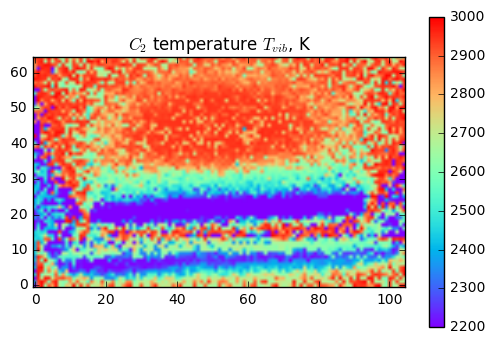

In [8]:
Z_vib = z_vib.reshape(int(z_vib.shape/(coord[:,1].max()+1)),-1)
fig, ax = plt.subplots()

#Horizontal mirrored by keyword origin="upper"
# im = plt.imshow(Z_vib, cmap=plt.cm.RdBu_r, vmin=abs(Z_vib).min(), vmax=abs(Z_vib).max())
im = plt.imshow(Z_vib.T, cmap=plt.cm.rainbow, vmin=2200, vmax=3000, origin="lower") # Pastel1, jet - OK
# # YlOrRd RdBu_r
im.set_interpolation('bilinear')

cb = fig.colorbar(im)

plt.title("$C_2$ temperature $T_{vib}$, K")
# plt.savefig("img/Tvib___"+raw_Mal[4:18]+".svg", dpi = 300)
# plt.savefig("img/Tvib___"+raw_Mal[4:18]+".png", dpi = 300)

## Plot $T_{e}$ and $C_{2}$ line

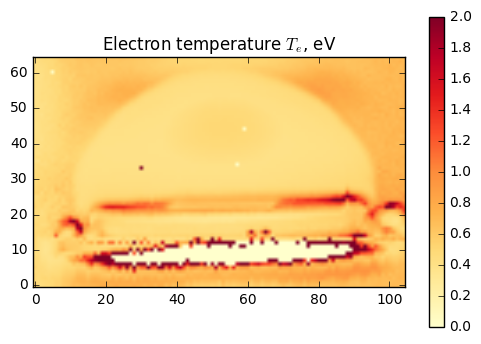

In [9]:
Z_e = z_e.reshape(int(z_e.shape/(coord[:,1].max()+1)),-1)
fig, ax = plt.subplots()

#Horizontal mirrored by keyword origin="upper"
# im = plt.imshow(Z_e, cmap=plt.cm.RdBu_r, vmin=abs(Z_vib).min(), vmax=abs(Z_vib).max())
im = plt.imshow(Z_e.T, cmap=plt.cm.YlOrRd, vmin=0, vmax=2, origin="lower")

im.set_interpolation('bilinear')

cb = fig.colorbar(im)

plt.title("Electron temperature $T_{e}$, eV")
# plt.savefig("img/Tvib___"+raw_Mal[4:18]+".svg", dpi = 300)
# plt.savefig("img/Tvib___"+raw_Mal[4:18]+".png", dpi = 300)

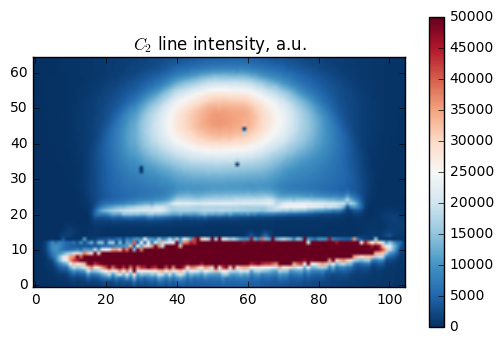

In [10]:
Z_c2 = z_c2.reshape(int(z_c2.shape/(coord[:,1].max()+1)),-1)
fig, ax = plt.subplots()

#Horizontal mirrored by keyword origin="upper"
# im = plt.imshow(Z_c2, cmap=plt.cm.RdBu_r, vmin=abs(Z_vib).min(), vmax=abs(Z_vib).max())
im = plt.imshow(Z_c2.T, vmin=0, vmax=50000, cmap=plt.cm.RdBu_r, origin="lower")

im.set_interpolation('bilinear')

cb = fig.colorbar(im)

plt.title("$C_2$ line intensity, a.u.")
# plt.savefig("img/Tvib___"+raw_Mal[4:18]+".svg", dpi = 300)
# plt.savefig("img/Tvib___"+raw_Mal[4:18]+".png", dpi = 300)